# Gridded sea surface height products
In this notebook we explore the content of gridded sea level anomaly products generated from satellite radar altimetry measurements by the CMEMS SL-TAC.

We give hints about:
* the different products,
* reading the files using python,
* some basic data manipulation/vizualisation techniques,

For this tutorial, we are going to use three files:
 * one delayed-time all satellites (DT-allsat),
 * one delayed-time two satellites (DT-2sat),
 * and one near-real-time (NRT) gridded file (NRT).

We will focus on the global product here, but any regional product would work in a similar way.
I'll suppose we have already downloaded the data files.

In [68]:
# imports
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

## basic file exploration
Gridded products are delivered as daily files, there is only one time step in each netCDF file.
The grid is regular in cartesian coordinates (longitude & latitude) at 1/4° of a degree.

In [84]:
# exploring file structure
nrt_allsat = './data/nrt_global_allsat_phy_l4_20190101_20190107.nc'
nc = xr.open_dataset(nrt_allsat)
print(nc)

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, nv: 2, time: 1)
Coordinates:
  * latitude   (latitude) float32 -89.875 -89.625 -89.375 ... 89.625 89.875
  * longitude  (longitude) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875
  * nv         (nv) int32 0 1
  * time       (time) datetime64[ns] 2019-01-01
Data variables:
    adt        (time, latitude, longitude) float64 ...
    crs        int32 ...
    err        (time, latitude, longitude) float64 ...
    lat_bnds   (latitude, nv) float32 ...
    lon_bnds   (longitude, nv) float32 ...
    sla        (time, latitude, longitude) float64 ...
    ugos       (time, latitude, longitude) float64 ...
    ugosa      (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    vgosa      (time, latitude, longitude) float64 ...
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                  

## plotting scalar fields

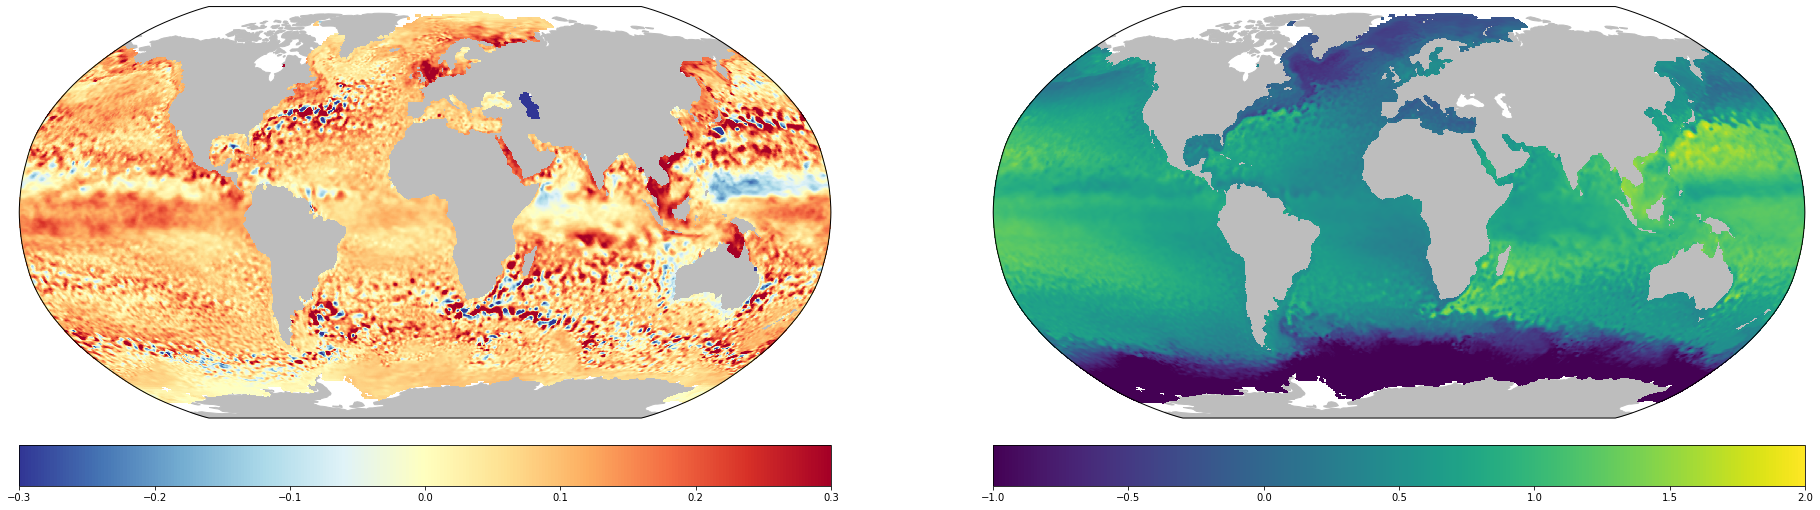

In [88]:
# plotting the SLA and ADT
## reading data from the file
lon = nc['longitude']
lat = nc['latitude']
sla = nc['sla'][0,:,:]
adt = nc['adt'][0,:,:]

## creating a figure
fig = plt.figure(figsize=(32,10))

# create two axes, with a Robinson Projection
ax_sla = fig.add_subplot(121, projection=ccrs.Robinson())
ax_adt = fig.add_subplot(122, projection=ccrs.Robinson())

# map the data
sla_mappable = ax_sla.pcolormesh(lon, lat, sla, 
                                transform=ccrs.PlateCarree(), 
                                vmin=-0.3, vmax=0.3,
                                cmap='RdYlBu_r')

adt_mappable = ax_adt.pcolormesh(lon, lat, adt, 
                                transform=ccrs.PlateCarree(),
                                vmin=-1.0, vmax=2.0)

# overlay continents
ax_sla.add_feature(cfeature.LAND, color='#bdbdbd')
ax_adt.add_feature(cfeature.LAND, color='#bdbdbd')

# show colorbars
fig.colorbar(sla_mappable, ax=ax_sla, orientation='horizontal', pad=.05)
fig.colorbar(adt_mappable, ax=ax_adt, orientation='horizontal', pad=.05)


<xarray.DataArray (latitude: 720, longitude: 1440)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * latitude   (latitude) float32 -89.875 -89.625 -89.375 ... 89.625 89.875
  * longitude  (longitude) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875
    time       datetime64[ns] 2019-01-01


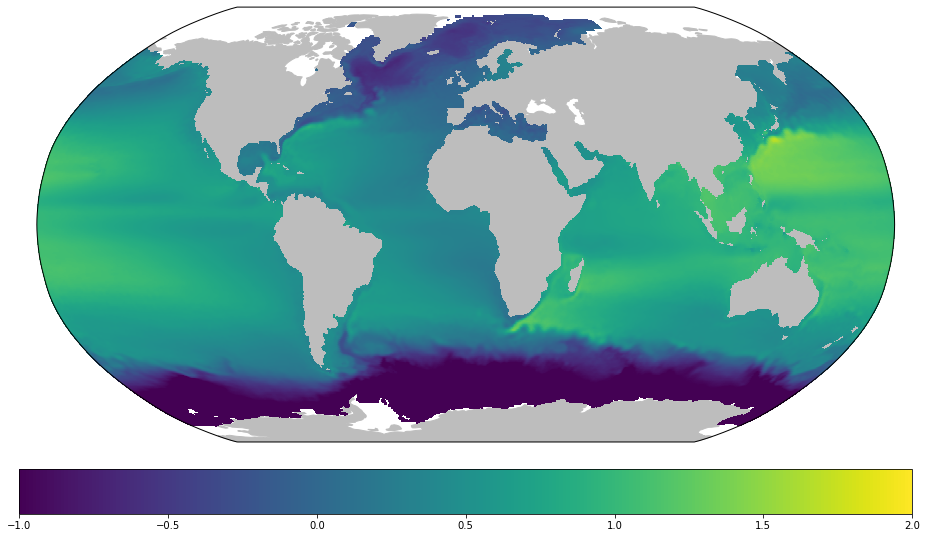

In [89]:
# SLA and ADT differ by the MDT
mdt = adt - sla
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=ccrs.Robinson())
mdt_mappable = ax.pcolormesh(lon, lat, mdt, 
                                transform=ccrs.PlateCarree(),
                                vmin=-1.0, vmax=2.0)
ax.add_feature(cfeature.LAND, color='#bdbdbd')
fig.colorbar(mdt_mappable, ax=ax, orientation='horizontal', pad=.05)

## overlaying currents

/home/pprandi/.conda/envs/py37/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in less
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/home/pprandi/.conda/envs/py37/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in greater
  u, v = self.projection.transform_vectors(t, x, y, u, v)


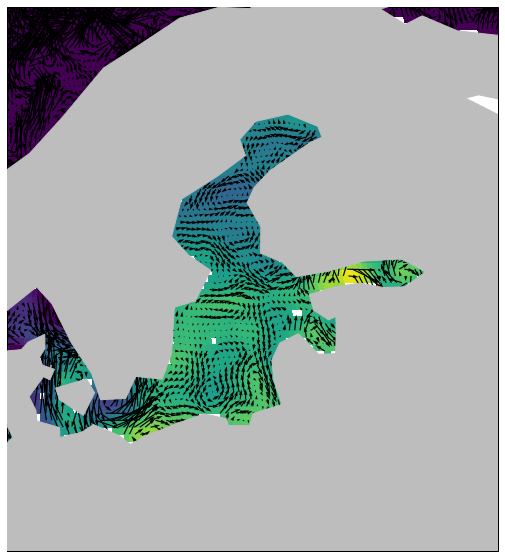

In [91]:
# ADT and total geostrophic currents
u = nc['ugos'][0,:,:]
v = nc['vgos'][0,:,:]

# create the figure
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_extent([10, 30, 50, 70], ccrs.Geodetic())
mappable = ax.pcolormesh(lon, lat, adt, 
                        transform=ccrs.PlateCarree(),
                        zorder=1,
                        vmin=0.2, vmax=0.6)
ax.quiver(lon.data, lat.data, u.data, v.data, transform=ccrs.PlateCarree(), scale=2.5)
ax.add_feature(cfeature.LAND, color='#bdbdbd',zorder=10)

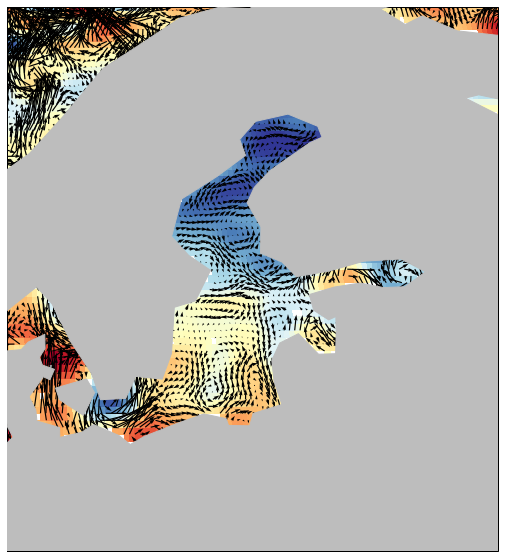

In [92]:
# read relevant data
# SLA and geostrophic currents anomalies
ua = nc.variables['ugosa'][0,:,:]
va = nc.variables['vgosa'][0,:,:]

# create the figure
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_extent([10, 30, 50, 70], ccrs.Geodetic())
mappable = ax.pcolormesh(lon, lat, sla, 
                        transform=ccrs.PlateCarree(),
                        zorder=1,
                        cmap='RdYlBu_r',
                        vmin=0., vmax=0.3)
ax.quiver(lon, lat, u.data, v.data, transform=ccrs.PlateCarree(), scale=2.5)
ax.add_feature(cfeature.LAND, color='#bdbdbd',zorder=10)

Visually, total currents and current anomalies are very similar in the Baltic Sea, this suggests that there are no large MDT gradients in the region.
Comparisons between total currents and current anomalies is left as an exercise here.

## differences between gridded products
DT-allsat, DT-twosat and NRT products are the results of different processings.
DT-allsat use all altimeters available at a given time, with the best quality standards (precise orbits, analysed meteorological fields, ...) at the cost of production delay.
NRT products also use all available altimeters, but with slightly less accurate standards (orbits and forecasted meteorological fields).

DT-twosat are brokered to CMEMS from C3S, they use only two altimeters at any given time and are more suitable for the analyis of long-term changes, but will have less small scale ocean features. These are only available in delayed-time mode.

In [94]:
# files we are going to use
dt_allsat = xr.open_dataset('./data/dt_global_allsat_phy_l4_20190101_20190515.nc')
dt_twosat = xr.open_dataset('./data/dt_global_twosat_phy_l4_20190101_vDT2018.nc')
nrt_allsat = xr.open_dataset('./data/nrt_global_allsat_phy_l4_20190101_20190107.nc')

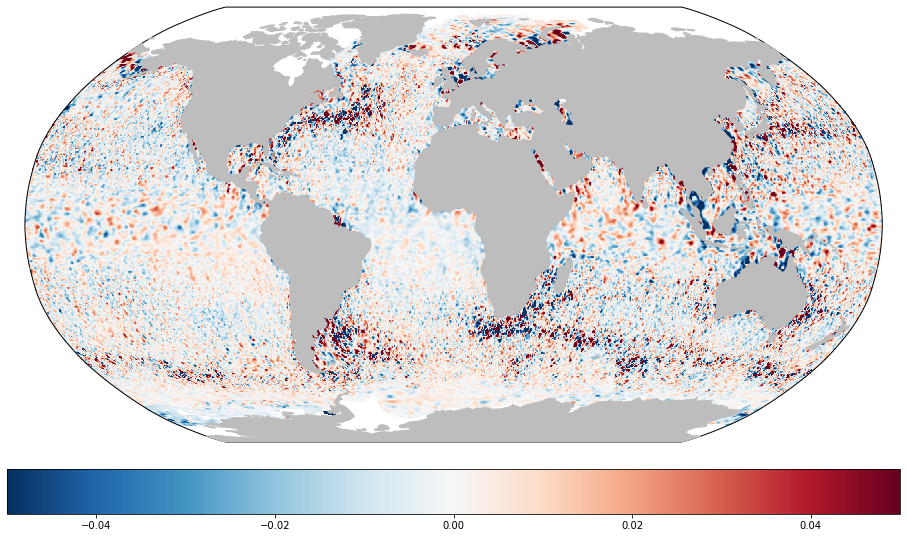

In [97]:
# difference between two sat/all sat delayed time products
diff = dt_twosat['sla'][0,:,:]- dt_allsat['sla'][0,:,:]
# create the figure
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()
mappable = ax.pcolormesh(dt_allsat['longitude'], dt_allsat['latitude'], diff, 
                        transform=ccrs.PlateCarree(),
                        zorder=1,
                        cmap='RdBu_r',
                        vmin=-0.05, vmax=0.05)
ax.add_feature(cfeature.LAND, color='#bdbdbd',zorder=10)
fig.colorbar(mappable, ax=ax, orientation='horizontal', pad=.05)

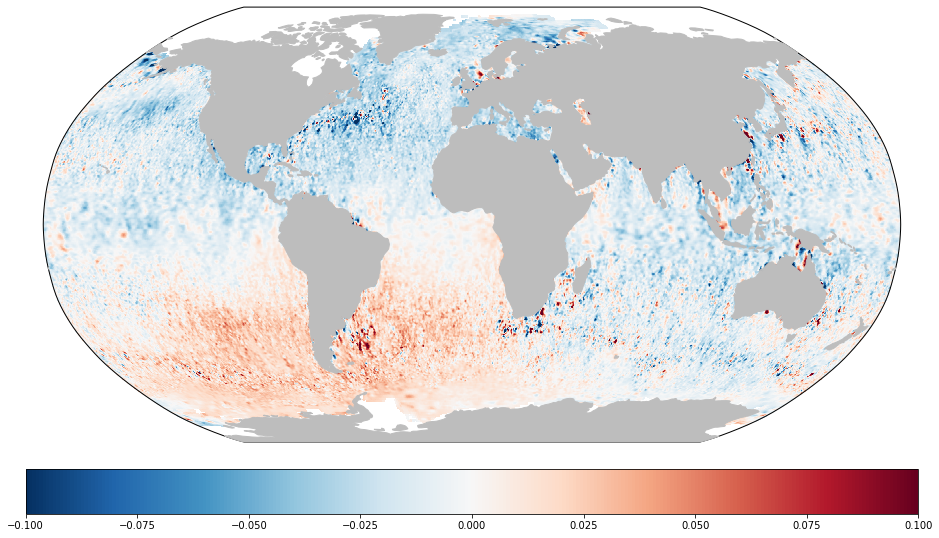

In [99]:
# difference between two sat/all sat delayed time products
diff = dt_allsat['sla'][0,:,:] - nrt_allsat['sla'][0,:,:] 
# create the figure
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()
mappable = ax.pcolormesh(dt_allsat['longitude'], dt_allsat['latitude'], diff, 
                        transform=ccrs.PlateCarree(),
                        zorder=1,
                        cmap='RdBu_r',
                        vmin=-0.1, vmax=0.1)
ax.add_feature(cfeature.LAND, color='#bdbdbd',zorder=10)

Warning: when switching from one product to another, continuity is not ensured!

## a simple comparisons to in-situ data

I've extracted SLA data over the Baltic Sea since 2018, and will try to compare it to sea level measured by the Helsinki tide gauge. 

position of station, 24.956199645996094/60.15359878540039


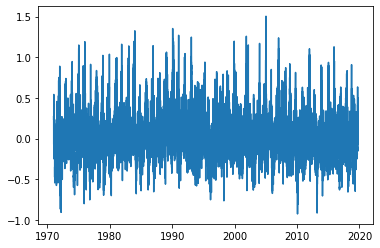

In [132]:
# open & preprocess TG data
tg = xr.open_dataset('./data/BO_TS_TG_Helsinki.nc')

# get station position
tg_lon = np.asscalar(np.unique(tg['LONGITUDE'].data))
tg_lat = np.asscalar(np.unique(tg['LATITUDE'].data))
print("position of station, %s/%s" %(tg_lon, tg_lat))

# read tide gauges data
tg_sl = tg['SLEV'][:,0]

# read quality check field
tg_qc = tg['SLEV_QC'][:,0]

# creata a mask where QC is one (==good_data)
mask = tg_qc.data==1.

# mask SL values accordingly
valid_tg_sla = np.ma.array(tg_sl.data, mask=~mask)
plt.plot(tg['TIME'], valid_tg_sla)

In [163]:
# open & preprocess ALT data
alt = xr.open_dataset('./data/sla_baltic_example.nc')

# read lon/lat step of grid
lon_step = alt.attrs['FROM_ORIGINAL_FILE__geospatial_lon_resolution']
lat_step = alt.attrs['FROM_ORIGINAL_FILE__geospatial_lat_resolution']

# find lon/lat of grid origin
lon_min = alt['longitude'].data.min()
lat_min = alt['latitude'].data.min()

# estimate index of tg position
lon_idx = int((tg_lon - lon_min)/lon_step)
lat_idx = int((tg_lat - lat_min)/lat_step)
print(alt['longitude'][lon_idx].data)
print(alt['latitude'][lat_idx].data)

# average ALT around the TG position
dx = 3
alt_avg = alt['sla'][:,lat_idx-dx:lat_idx+dx,lon_idx-dx:lon_idx+dx].mean(axis=(1,2))

24.875
60.125


(736695.0, 737060.0)

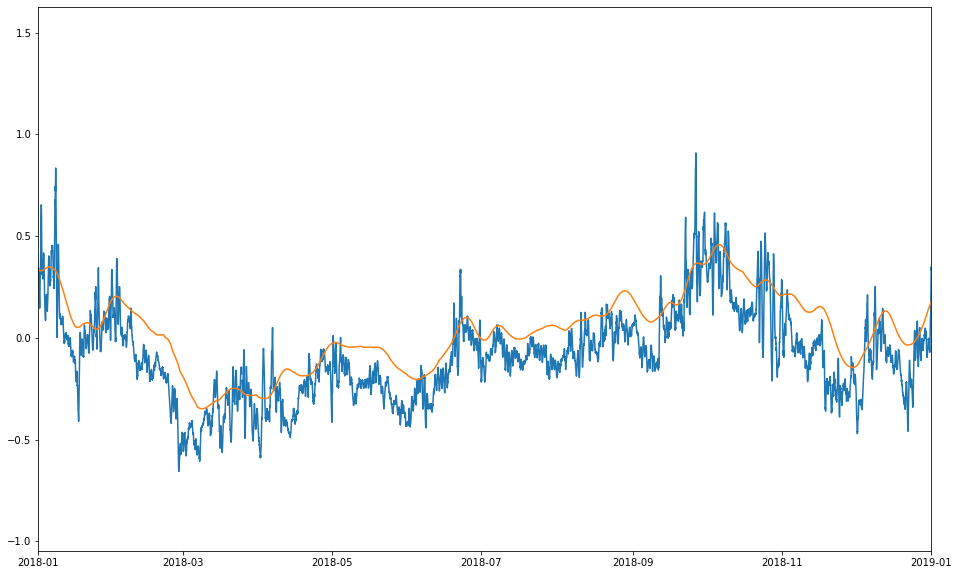

In [164]:
from datetime import datetime

# plot the two time series
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.plot(tg['TIME'], valid_tg_sla)
ax.plot(alt['time'], alt_avg)
start = datetime.strptime('2018-01-01', '%Y-%m-%d')
stop = datetime.strptime('2019-01-01', '%Y-%m-%d')
ax.set_xlim(start, stop)
